# Monty Hall Problem

## SOURCE: pgmpy project, edited

### Problem Description:
The Monty Hall Problem is a very famous problem in Probability Theory. The question goes like:


Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

By intution it seems that there shouldn't be any benefit of switching the door. But using Bayes' Theorem we can show that by switching the door the contestant has more chances of winning.

You can also checkout the wikipedia page: https://en.wikipedia.org/wiki/Monty_Hall_problem

### Probabilistic Interpretetion:
So have 3 random variables Contestant $ C \in \{1, 2, 3\} $, Host $ H \in \{1, 2, 3\} $ and prize $ P \in \{1, 2, 3 \} $. The prize has been put randomly behind the doors therefore: $ P(P=1) = P(P=2) = P(P=3) = \frac{1}{3} $. Also, the contestant is going to choose the door randomly, therefore: $ P(C=1) = P(C=2) = P(C=3) = \frac{1}{3} $. For this problem we can build a Bayesian Network structure like:



Finding Elimination Order: : : 0it [14:10, ?it/s]


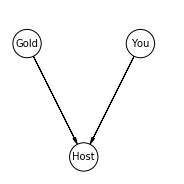

In [6]:
import matplotlib.pyplot as plt
import daft
from daft import PGM

plt.rcParams['figure.facecolor'] = 'white'
pgm = PGM(shape=[3, 3])

pgm.add_node(daft.Node('P', r"Gold", 1, 3))
pgm.add_node(daft.Node('C', r"You", 3, 3))
pgm.add_node(daft.Node('H', r"Host", 2, 1))


pgm.add_edge('P', 'H')
pgm.add_edge('C', 'H')
pgm.render()
plt.show()

with the following CPDs:

<pre>

P(C):
+----------+----------+-----------+-----------+
|    C     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(P):
+----------+----------+-----------+-----------+
|    P     |     0    |     1     |      2    |
+----------+----------+-----------+-----------+
|          |    0.33  |    0.33   |    0.33   |
+----------+----------+-----------+-----------+

P(H | P, C):
+------+------+------+------+------+------+------+------+------+------+
|   C  |          0         |          1         |          2         |
+------+------+------+------+------+------+------+------+------+------+
|   P  |   0  |   1  |   2  |   0  |   1  |   2  |   0  |   1  |   2  |
+------+------+------+------+------+------+------+------+------+------+
|  H=0 |   0  |   0  |   0  |   0  |  0.5 |   1  |   0  |   1  |  0.5 | 
+------+------+------+------+------+------+------+------+------+------+
|  H=1 |  0.5 |   0  |   1  |   0  |   0  |   0  |   1  |   0  |  0.5 |
+------+------+------+------+------+------+------+------+------+------+
|  H=2 |  0.5 |   1  |   0  |   1  |  0.5 |   0  |   0  |   0  |   0  |
+------+------+------+------+------+------+------+------+------+------+
</pre>

Let's say that the contestant selected door 0 and the host opened door 2, we need to find the probability of the prize i.e. P(P | H=2, C=0).

In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the network structure
model = BayesianModel([('C', 'H'), ('P', 'H')])

# Defining the CPDs:
cpd_c = TabularCPD('C', 3, [[0.33], [0.33], [0.33]])
cpd_p = TabularCPD('P', 3, [[0.33], [0.33], [0.33]])
cpd_h = TabularCPD('H', 3, [[0, 0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0, 0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0]],
                  evidence=['C', 'P'], evidence_card=[3, 3])

# Associating the CPDs with the network structure.
model.add_cpds(cpd_c, cpd_p, cpd_h)

# Some other methods
model.get_cpds()

[<TabularCPD representing P(C:3) at 0x2049927fd60>,
 <TabularCPD representing P(P:3) at 0x204c6f5b460>,
 <TabularCPD representing P(H:3 | C:3, P:3) at 0x204c6f5b370>]

In [4]:
# check_model check for the model structure and the associated CPD and returns True if everything is correct otherwise throws an exception
model.check_model()

True

In [5]:
# Infering the posterior probability 
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(['P'], evidence={'C': 0, 'H': 2})
print(posterior_p)

0it [00:00, ?it/s]

+------+----------+
| P    |   phi(P) |
+======+==========+
| P(0) |   0.3333 |
+------+----------+
| P(1) |   0.6667 |
+------+----------+
| P(2) |   0.0000 |
+------+----------+


We see that the posterior probability of having the prize behind door 1 is more that door 0. Therefore the contestant should switch the door.